Entropia da classe: 0.3126
-----------------------------------------------------------------------------------------------
Atributo                          Entropia Padrão   Entropia Condicional    Ganho de Informação
-----------------------------------------------------------------------------------------------
Situação_censitária                        0.8293                 0.3116                 0.0010
V0031                                      1.4113                 0.3121                 0.0005
Sexo                                       0.9956                 0.3120                 0.0005
Cor/Raça                                   1.4480                 0.3124                 0.0002
Plano_de_saúde                             0.6953                 0.3119                 0.0006
Frequência_distúrbios_do_sono              1.5765                 0.3048                 0.0077
Frequência_falta_de_disposição             1.3452                 0.3048                 0.0078
Frequência_fa

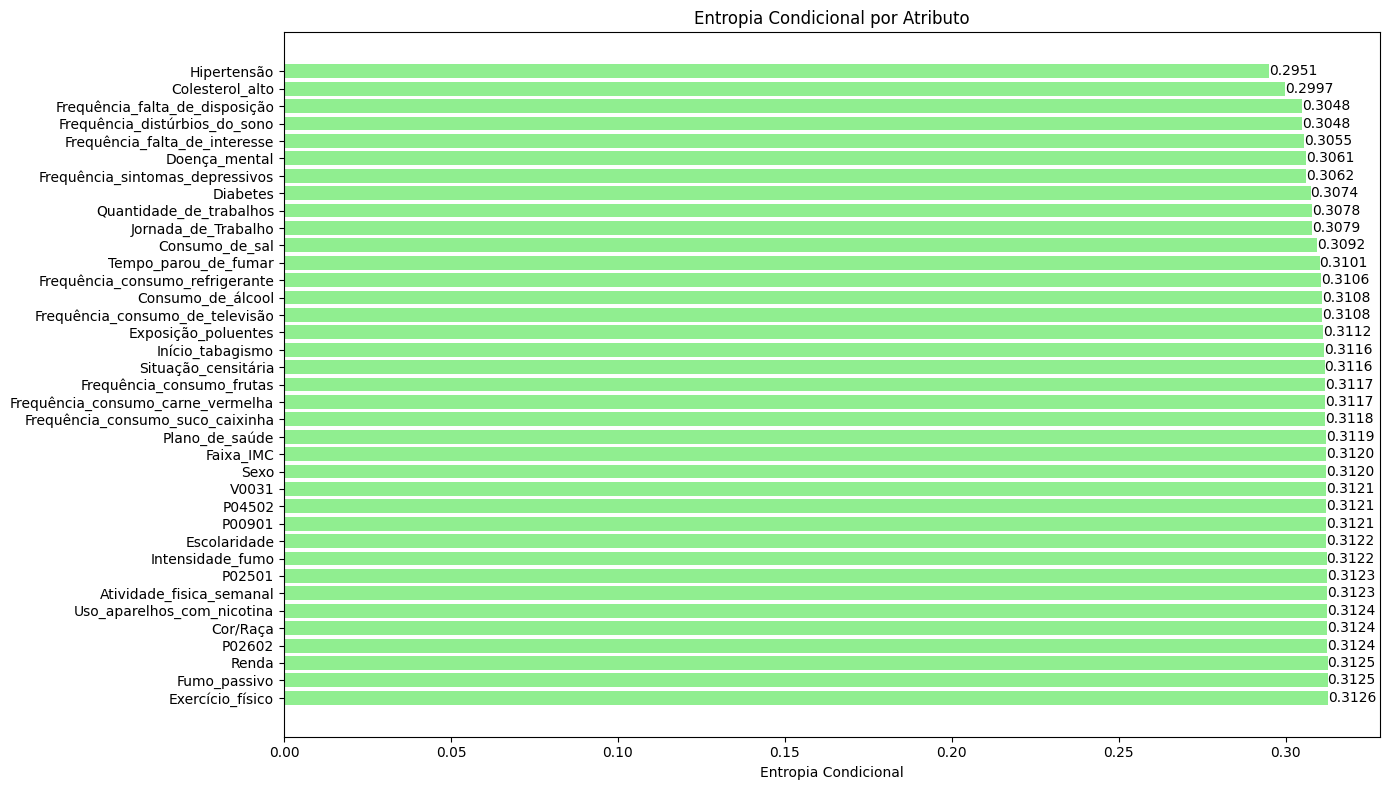


Atributos ordenados por ganho de informação:
---------------------------------------------------
Atributo                        Ganho de Informação
---------------------------------------------------
Hipertensão                                  0.0175
Colesterol_alto                              0.0129
Frequência_falta_de_disposição               0.0078
Frequência_distúrbios_do_sono                0.0077
Frequência_falta_de_interesse                0.0071
Doença_mental                                0.0064
Frequência_sintomas_depressivos               0.0064
Diabetes                                     0.0052
Quantidade_de_trabalhos                      0.0047
Jornada_de_Trabalho                          0.0046
Consumo_de_sal                               0.0034
Tempo_parou_de_fumar                         0.0025
Frequência_consumo_refrigerante               0.0020
Consumo_de_álcool                            0.0018
Frequência_consumo_de_televisão               0.0018
Exposição_polue

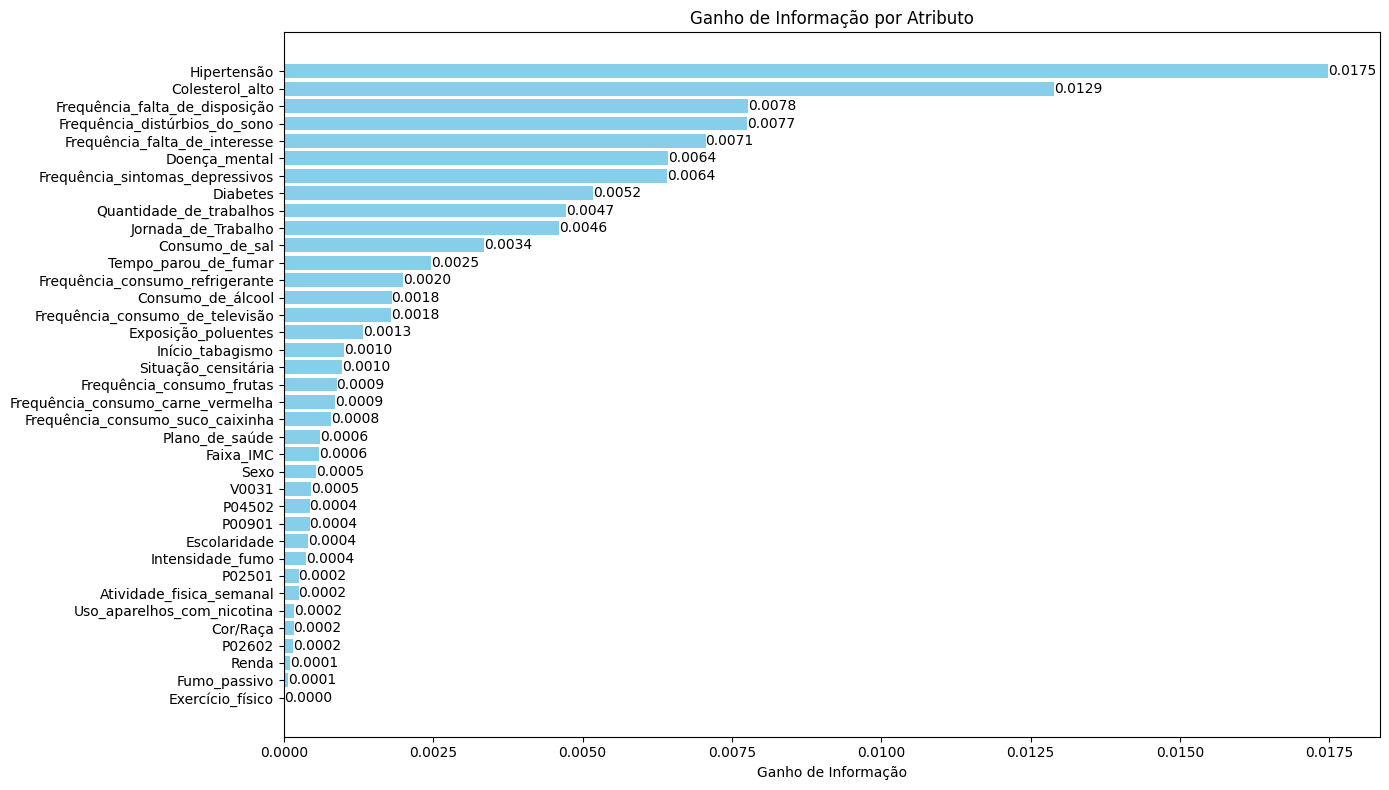

In [1]:
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt

base = pd.read_csv("../Bases/Criados/6_base_final.csv")
classe = "Doença_cardíaca"

def entropia_padrao(column):
    prob = column.value_counts(normalize=True)
    return entropy(prob, base=2)

def entropia_condicional(atributo, classe):
    df = pd.concat([atributo, classe], axis=1)
    valores = atributo.unique()
    total = len(atributo)
    entropia_cond = 0.0
    for valor in valores:
        subset = df[df[atributo.name] == valor][classe.name]
        proporcao = len(subset) / total
        entropia_subset = entropia_padrao(subset)
        entropia_cond += proporcao * entropia_subset
    return entropia_cond

entropia_classe = entropia_padrao(base[classe])
print(f"Entropia da classe: {round(entropia_classe, 4)}")
print("-" * 95)

ganhos = {}
entropias_cond = {}

print(f"{'Atributo':<30} {'Entropia Padrão':>18} {'Entropia Condicional':>22} {'Ganho de Informação':>22}")
print("-" * 95)

for atributo in base.columns:
    if atributo == classe:
        continue
    entropia_atr = entropia_padrao(base[atributo])
    entropia_cond = entropia_condicional(base[atributo], base[classe])
    ganho = entropia_classe - entropia_cond
    ganhos[atributo] = ganho
    entropias_cond[atributo] = entropia_cond
    print(f"{atributo:<30} {entropia_atr:>18.4f} {entropia_cond:>22.4f} {ganho:>22.4f}")

# Ordena as entropias condicionais
entropias_cond_ordenadas = sorted(entropias_cond.items(), key=lambda x: x[1])

# --- Gráfico de Entropia Condicional ---
plt.figure(figsize=(14, 8))
atributos_cond = [item[0] for item in entropias_cond_ordenadas]
valores_cond = [item[1] for item in entropias_cond_ordenadas]

bars = plt.barh(atributos_cond, valores_cond, color='lightgreen')
plt.xlabel('Entropia Condicional')
plt.title('Entropia Condicional por Atributo')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # Coloca o menor no topo
plt.tight_layout()
plt.show()

# Ordena os ganhos
ganhos_ordenados = sorted(ganhos.items(), key=lambda x: x[1], reverse=True)

print("\nAtributos ordenados por ganho de informação:")
print("-" * 51)
print(f"{'Atributo':<30} {'Ganho de Informação':>20}")
print("-" * 51)

for atributo, ganho in ganhos_ordenados:
    print(f"{atributo:<30} {ganho:>20.4f}")

# --- Gráfico de Ganho de Informação ---
plt.figure(figsize=(14, 8))
atributos_ganho = [item[0] for item in ganhos_ordenados]
valores_ganho = [item[1] for item in ganhos_ordenados]

bars = plt.barh(atributos_ganho, valores_ganho, color='skyblue')
plt.xlabel('Ganho de Informação')
plt.title('Ganho de Informação por Atributo')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

In [2]:
# --- Filtrar atributos com entropia condicional acima de um limiar ---
limiar = 0.312  # <-- Defina aqui o valor desejado para o limiar

atributos_acima_limiar = {atributo: entropia for atributo, entropia in entropias_cond.items() if entropia > limiar}

print(f"\nAtributos com entropia condicional acima de {limiar}:")
print("-" * 51)
print(f"{'Atributo':<30} {'Entropia Condicional':>20}")
print("-" * 51)

for atributo, entropia in sorted(atributos_acima_limiar.items(), key=lambda x: x[1], reverse=True):
    print(f"{atributo:<30} {entropia:>20.4f}")


Atributos com entropia condicional acima de 0.312:
---------------------------------------------------
Atributo                       Entropia Condicional
---------------------------------------------------
Exercício_físico                             0.3126
Fumo_passivo                                 0.3125
Renda                                        0.3125
P02602                                       0.3124
Cor/Raça                                     0.3124
Uso_aparelhos_com_nicotina                   0.3124
Atividade_fisica_semanal                     0.3123
P02501                                       0.3123
Intensidade_fumo                             0.3122
Escolaridade                                 0.3122
P00901                                       0.3121
P04502                                       0.3121
V0031                                        0.3121
Sexo                                         0.3120


In [3]:
base = base.drop(columns=[
    'Renda',
    'Fumo_passivo',
    'Exercício_físico',
    'Hipertensão',
    'Colesterol_alto',
    'P02602',
    'P02501',
    'P00901',
    'P04502',
    'V0031',
    'Frequência_falta_de_disposição'
])


In [4]:
# base = base.drop(columns=[
#    'Exercício_físico',
#    'Fumo_passivo',
#    'Renda',
#    'P02602',
#    'Cor/Raça',
#    'Uso_aparelhos_com_nicotina',
#    'Atividade_fisica_semanal',
#    'P02501',
#    'Intensidade_fumo',
#    'Escolaridade',
#    'P00901',
#    'P04502',
#    'V0031',
#    'Sexo'
#])

In [5]:
base.to_csv('../Bases/Criados/6.1_base_final.csv', index=False)